In [1]:
import networkx as nx
import numpy as np
import itertools

import matplotlib.pyplot as plt

In [2]:
G = nx.karate_club_graph()

print('#nodes:', len(G.nodes()), 'and', '#edges:', len(G.edges()))

#nodes: 34 and #edges: 78


In [3]:
node_to_degrees = sorted(dict(G.degree()).items(), key = lambda x: x[1], reverse = True)

## view the top 5,
node_to_degrees[:5]

[(33, 17), (0, 16), (32, 12), (2, 10), (1, 9)]

In [4]:
## calculate degree centrality,
betweenness_centrality = nx.betweenness_centrality(G)

## set degree centrality metrics on each node,
nx.set_node_attributes(G, betweenness_centrality, 'bc')

sorted(G.nodes(data=True), key = lambda x: x[1]['bc'], reverse=True)

[(0, {'bc': 0.43763528138528146, 'club': 'Mr. Hi'}),
 (33, {'bc': 0.30407497594997596, 'club': 'Officer'}),
 (32, {'bc': 0.145247113997114, 'club': 'Officer'}),
 (2, {'bc': 0.14365680615680618, 'club': 'Mr. Hi'}),
 (31, {'bc': 0.13827561327561325, 'club': 'Officer'}),
 (8, {'bc': 0.05592682780182781, 'club': 'Mr. Hi'}),
 (1, {'bc': 0.053936688311688304, 'club': 'Mr. Hi'}),
 (13, {'bc': 0.04586339586339586, 'club': 'Mr. Hi'}),
 (19, {'bc': 0.03247504810004811, 'club': 'Mr. Hi'}),
 (5, {'bc': 0.02998737373737374, 'club': 'Mr. Hi'}),
 (6, {'bc': 0.029987373737373736, 'club': 'Mr. Hi'}),
 (27, {'bc': 0.02233345358345358, 'club': 'Officer'}),
 (23, {'bc': 0.017613636363636363, 'club': 'Officer'}),
 (30, {'bc': 0.014411976911976909, 'club': 'Officer'}),
 (3, {'bc': 0.011909271284271283, 'club': 'Mr. Hi'}),
 (25, {'bc': 0.0038404882154882154, 'club': 'Officer'}),
 (29, {'bc': 0.0029220779220779218, 'club': 'Officer'}),
 (24, {'bc': 0.0022095959595959595, 'club': 'Officer'}),
 (28, {'bc': 0.00

(-0.7529713920943565,
 0.7009918355644522,
 -0.9928230546093743,
 1.0948963359337798)

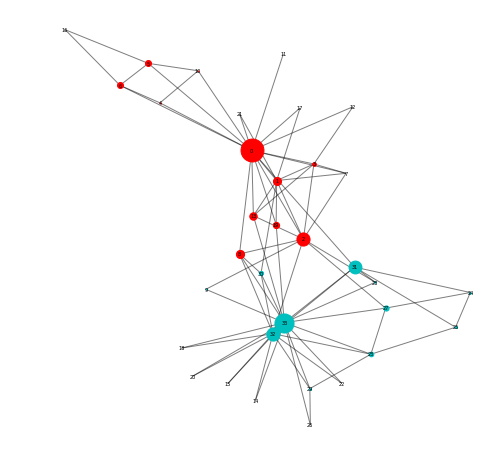

In [5]:
nodes = G.nodes(data = True)

clubs = np.unique([ data['club'] for n, data in nodes ])

plt.figure(figsize=(8, 8))

layout = nx.spring_layout(G)

colors = [ 'r', 'c' ]
for i, club in enumerate(clubs):
    color = colors[i]
    
    nodes_for_club = [ (n, data) for n, data in nodes if data['club'] == club ]
    
    for key, nodes_in_club in itertools.groupby(sorted(nodes_for_club, key=lambda x: x[1]['bc']), key=lambda x: x[1]['bc']):
        nodelist = [ n[0] for n in nodes_in_club ]
        nx.draw_networkx_nodes(
            G,
            layout,
            nodelist=nodelist,
            node_color=color,
            node_size=key*1200)

nx.draw_networkx_labels(G, layout, dict([ (n[0], n[0]) for n in nodes ]), font_size=5)
nx.draw_networkx_edges(G, layout, width=1.0, alpha=0.5)

plt.axis('off')